# Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
# Data Pre-processing
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/home/ismail/Desktop/PDC_Project/data/data.csv'

df = pd.read_csv(file_path)

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.75,55.0,B,875.98,No,8,44.16,0
1,31.33,39.0,C,839.91,No,4,13.93,1
2,23.87,10.0,A,1364.70,Yes,4,15.16,0
3,35.64,34.0,C,1462.07,No,4,15.71,1
4,NaN,NaN,C,710.61,No,8,13.77,1


In [8]:
df.shape

(41000, 8)

In [3]:
df.isnull().sum()

feature_1    2054
feature_2    2050
feature_3       0
feature_4    2054
feature_5       0
feature_6       0
feature_7    2036
target          0
dtype: int64

In [4]:
df.describe()

,feature_1,feature_2,feature_4,feature_6,feature_7,target
count,38946.000000,38950.000000,38946.000000,41000.000000,38964.000000,41000.000000
mean,29.990843,49.436560,1092.312002,5.010732,23.145819,0.398000
std,5.000959,28.963859,1012.051699,2.582285,47.562436,0.489491
min,7.670000,0.000000,-155.620000,1.000000,0.000000,0.000000
25%,26.600000,25.000000,801.150000,3.000000,5.830000,0.000000
50%,30.000000,49.000000,1004.735000,5.000000,14.180000,0.000000
75%,33.390000,75.000000,1208.140000,7.000000,28.370000,1.000000
max,52.400000,99.000000,17643.400000,9.000000,1660.800000,1.000000


# Handling Missiing Values

In [5]:
# Numeric columns
num_imputer = SimpleImputer(strategy="mean")
df[['feature_1', 'feature_2', 'feature_4', 'feature_7']] = num_imputer.fit_transform(df[['feature_1', 'feature_2', 'feature_4', 'feature_7']])

In [6]:
df.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
feature_6    0
feature_7    0
target       0
dtype: int64

# Encoding Categorical Features

In [8]:
# feature_3 (A/B/C) → Use Label Encoding (A=0, B=1, C=2).
le = LabelEncoder()
df['feature_3'] = le.fit_transform(df['feature_3'])

# feature_5 (Yes/No) → Map manually (Yes=1, No=0).
df['feature_5'] = df['feature_5'].map({'Yes': 1, 'No': 0})

In [9]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.750000,55.00000,1,875.98,0,8,44.16,0
1,31.330000,39.00000,2,839.91,0,4,13.93,1
2,23.870000,10.00000,0,1364.70,1,4,15.16,0
3,35.640000,34.00000,2,1462.07,0,4,15.71,1
4,29.990843,49.43656,2,710.61,0,8,13.77,1


# Class Distribution

In [9]:
values = df['target'].value_counts()
total = values.sum()

val_dict  = {
    values[0] : values[0]/total,
    values[1] : values[1]/total
}

rows = ['0', '1']

result_df = pd.DataFrame({
    'Class': rows,
    'Count': [values[0], values[1]],
    'Percentage': [values[0]/total * 100, values[1]/total * 100]
})

result_df


,Class,Count,Percentage
0,0,24682,60.2
1,1,16318,39.8


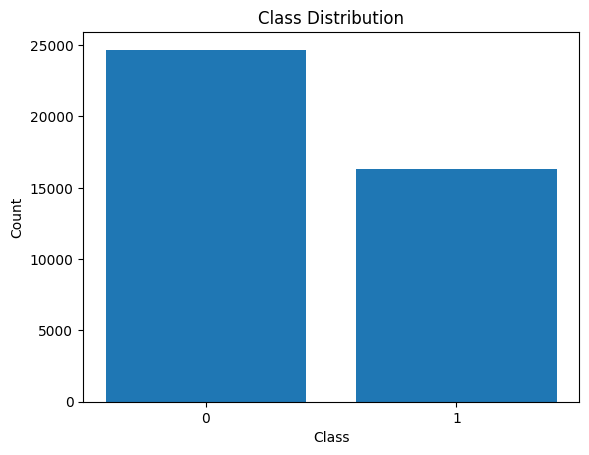

In [10]:
x_bar = result_df['Class']
y_bar = result_df['Count']

plt.bar(x_bar, y_bar, )
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

#  Linear Correlation 

In [12]:
df.corr().style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
feature_1,1.000000,-0.005120,-0.001790,-0.002596,-0.001128,-0.006288,-0.010552,-0.013926
feature_2,-0.005120,1.000000,-0.002838,-0.002840,-0.004140,-0.000947,0.007323,0.000890
feature_3,-0.001790,-0.002838,1.000000,-0.007419,0.015162,0.008983,0.008237,0.008448
feature_4,-0.002596,-0.002840,-0.007419,1.000000,-0.001626,0.007698,-0.003203,0.003063
feature_5,-0.001128,-0.004140,0.015162,-0.001626,1.000000,0.004775,-0.000590,0.003432
feature_6,-0.006288,-0.000947,0.008983,0.007698,0.004775,1.000000,-0.005197,0.003625
feature_7,-0.010552,0.007323,0.008237,-0.003203,-0.000590,-0.005197,1.000000,0.004343
target,-0.013926,0.000890,0.008448,0.003063,0.003432,0.003625,0.004343,1.000000


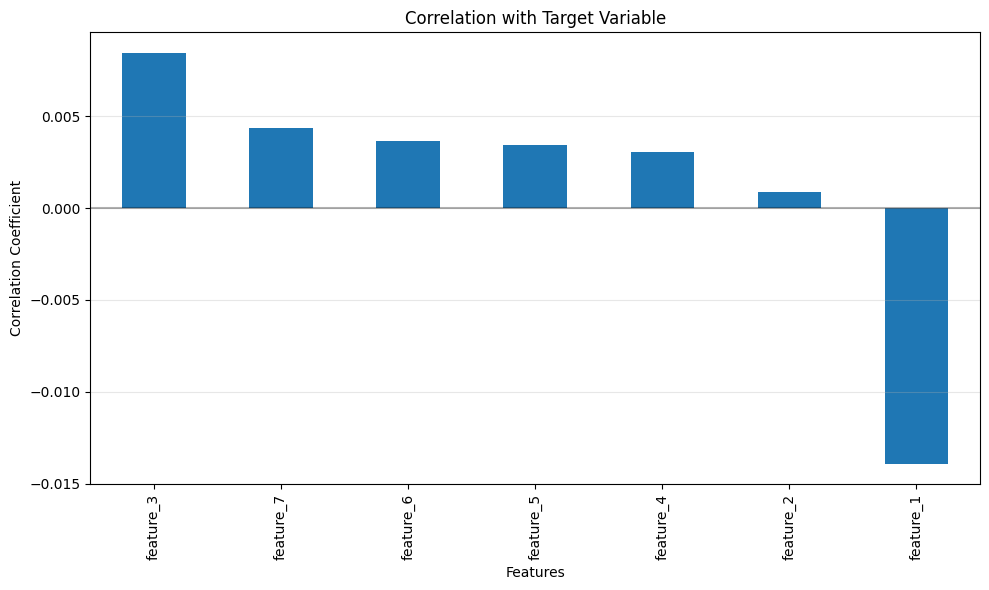

In [13]:
target_corr = df.corr()['target'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
target_corr.drop('target').plot(kind='bar')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Non-Linear Correlation Methods

     Feature  Importance
3  feature_4    0.230262
6  feature_7    0.218191
0  feature_1    0.216800
1  feature_2    0.174749
5  feature_6    0.091807
2  feature_3    0.043414
4  feature_5    0.024777


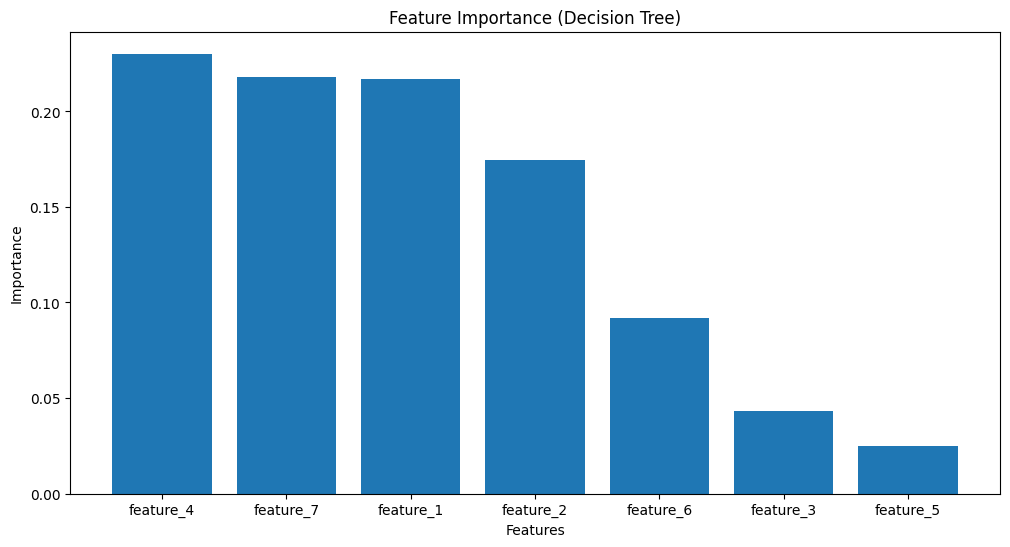

In [14]:
X = df.drop('target', axis=1)
y = df['target']

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

tree_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(tree_importances)

X_bar = tree_importances['Feature']
Y_bar = tree_importances['Importance']


plt.figure(figsize=(12, 6))
plt.bar(X_bar, Y_bar)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Decision Tree)')
plt.show()


# Saving Cleaned data to CSV

In [ ]:
# Destination Folder
dsc_folder = '/home/ismail/Desktop/PDC_Project/data/'

# Saving DF to CSV
df.to_csv(f'{dsc_folder}cleaned_data.csv', index=False)

# Feature Engineering

In [60]:
df = pd.read_csv(f'{dsc_folder}cleaned_data.csv')

df.head() 

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.750000,55.00000,1,875.98,0,8,44.16,0
1,31.330000,39.00000,2,839.91,0,4,13.93,1
2,23.870000,10.00000,0,1364.70,1,4,15.16,0
3,35.640000,34.00000,2,1462.07,0,4,15.71,1
4,29.990843,49.43656,2,710.61,0,8,13.77,1


In [61]:
# Step 3: Interaction Features
df['f1_by_f2'] = df['feature_1'] / (df['feature_2'] + 1e-5)  # avoid division by zero
df['f4_by_f6'] = df['feature_4'] / (df['feature_6'] + 1e-5)

# Step 4: Binning Feature_7
df['feature_7_bin'] = pd.qcut(df['feature_7'], q=3, labels=['low', 'medium', 'high'])
df = pd.get_dummies(df, columns=['feature_7_bin'])

# Step 5: Domain-Inspired Feature
df['cost_per_unit'] = df['feature_4'] / (df['feature_6'] + 1e-5)

# Step 6: Polynomial Features (on numerical only)
poly_features = ['feature_1', 'feature_2']
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_df = pd.DataFrame(poly.fit_transform(df[poly_features]), columns=poly.get_feature_names_out(poly_features))
df = pd.concat([df, poly_df.drop(columns=poly_features)], axis=1)

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target,f1_by_f2,f4_by_f6,feature_7_bin_low,feature_7_bin_medium,feature_7_bin_high,cost_per_unit,feature_1 feature_2
0,27.750000,55.00000,1,875.98,0,8,44.16,0,0.504545,109.497363,False,False,True,109.497363,1526.250000
1,31.330000,39.00000,2,839.91,0,4,13.93,1,0.803333,209.976975,False,True,False,209.976975,1221.870000
2,23.870000,10.00000,0,1364.70,1,4,15.16,0,2.386998,341.174147,False,True,False,341.174147,238.700000
3,35.640000,34.00000,2,1462.07,0,4,15.71,1,1.048235,365.516586,False,True,False,365.516586,1211.760000
4,29.990843,49.43656,2,710.61,0,8,13.77,1,0.606653,88.826139,False,True,False,88.826139,1482.644124


In [62]:
le = LabelEncoder()
df['feature_7_bin_low'] = le.fit_transform(df['feature_7_bin_low'])

df['feature_7_bin_medium'] = le.fit_transform(df['feature_7_bin_medium'])

df['feature_7_bin_high'] = le.fit_transform(df['feature_7_bin_high'])

In [23]:
scale_cols = ['f1_by_f2', 'f4_by_f6']
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

In [63]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target,f1_by_f2,f4_by_f6,feature_7_bin_low,feature_7_bin_medium,feature_7_bin_high,cost_per_unit,feature_1 feature_2
0,27.750000,55.00000,1,875.98,0,8,44.16,0,0.504545,109.497363,0,0,1,109.497363,1526.250000
1,31.330000,39.00000,2,839.91,0,4,13.93,1,0.803333,209.976975,0,1,0,209.976975,1221.870000
2,23.870000,10.00000,0,1364.70,1,4,15.16,0,2.386998,341.174147,0,1,0,341.174147,238.700000
3,35.640000,34.00000,2,1462.07,0,4,15.71,1,1.048235,365.516586,0,1,0,365.516586,1211.760000
4,29.990843,49.43656,2,710.61,0,8,13.77,1,0.606653,88.826139,0,1,0,88.826139,1482.644124


In [64]:
to_drop = ['feature_3','feature_5','feature_6','f1_by_f2','feature_4','feature_7_bin_low']
#to_drop = ['feature_3','feature_5','feature_6','f1_by_f2','feature_4','feature_7_bin_low']

df = df.drop(to_drop, axis=1)

df.head()

,feature_1,feature_2,feature_7,target,f4_by_f6,feature_7_bin_medium,feature_7_bin_high,cost_per_unit,feature_1 feature_2
0,27.750000,55.00000,44.16,0,109.497363,0,1,109.497363,1526.250000
1,31.330000,39.00000,13.93,1,209.976975,1,0,209.976975,1221.870000
2,23.870000,10.00000,15.16,0,341.174147,1,0,341.174147,238.700000
3,35.640000,34.00000,15.71,1,365.516586,1,0,365.516586,1211.760000
4,29.990843,49.43656,13.77,1,88.826139,1,0,88.826139,1482.644124


In [69]:
# Separate the classes
df_0 = df[df['target'] == 0]
df_1 = df[df['target'] == 1]

# Undersample 0s to match number of 1s
df_0_under = df_0.sample(n=len(df_1), random_state=42)

# Combine
df_balanced = pd.concat([df_0_under, df_1]).sample(frac=1, random_state=42).reset_index(drop=True)


In [72]:
df.head()

,feature_1,feature_2,feature_7,target,f4_by_f6,feature_7_bin_medium,feature_7_bin_high,cost_per_unit,feature_1 feature_2
0,27.750000,55.00000,44.16,0,109.497363,0,1,109.497363,1526.250000
1,31.330000,39.00000,13.93,1,209.976975,1,0,209.976975,1221.870000
2,23.870000,10.00000,15.16,0,341.174147,1,0,341.174147,238.700000
3,35.640000,34.00000,15.71,1,365.516586,1,0,365.516586,1211.760000
4,29.990843,49.43656,13.77,1,88.826139,1,0,88.826139,1482.644124


In [8]:
df.to_csv(f'{dsc_folder}cleaned_data.csv',index=False)